<a href="https://colab.research.google.com/github/Mateo289/TAM/blob/main/Talleres/ReduccionDimension.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje no supervisado - reducción de dimensión

- Se presentan los conceptos y simulaciones básicas relacionadas con técnicas clásicas lineales y no lineales de reducción de dimensión.

## Análisis de componentes de principales - Principal Component Analysis (PCA)

![gifpca](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*TXIbCytfgo5p5hty.gif)


- PCA busca un espacio de menor dimensión que preserve la mayor cantidad de variabilidad posible desde el espacio original (alta dimensión).

- Desde una perspectiva generativa, PCA asume que los datos $\mathbf{X} \in \mathbb{R}^{N \times P}$ son generados desde un espacio de baja dimensión (espacio latente) $\mathbf{Z} \in \mathbb{R}^{N \times M}$, donde $M < P$:

\begin{equation}
\mathbf{X} = \mathbf{Z} \mathbf{W}^T,
\end{equation}

- $\mathbf{Z}=\mathbf{X}\mathbf{W}$: matriz de baja dimensión.
- $\mathbf{W} \in \mathbb{R}^{P \times M}$: componentes principales (loading vectors).

El problema de optimización desde el punto de vista generativo:

\begin{align}
\mathbf{W}^*=&\arg\min_\mathbf{W} \|\mathbf{X}-\mathbf{Z} \mathbf{W}^T\|_F \\
   \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}



- PCA también puede resolverse maximizando la varianza de los datos proyectados.

- Asumiendo datos centralizados $\mathbf{X}$, la covarianza $\mathbf{\Sigma}\in \mathbb{R}^{P \times P}$ se define como:

\begin{equation}
\mathbf{\Sigma} = \frac{1}{N} \mathbf{X}^T \mathbf{X}.
\end{equation}

- El problema de optimización de PCA se puede reescribir como:

\begin{align}
\mathbf{W}^*=&\arg\max_\mathbf{W} \text{tr}(\mathbf{W}^T \mathbf{\Sigma} \mathbf{W}),\\
 \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}


- La solución del problema se centra en los $M$ vectores propios de la matriz de covarianza, correspodiente a los $M$ valores propios más altos.

- Ver la demostración [PCA generativo a PCA por varianza](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf).


**Ejemplo:** Construyamos un conjunto de datos 3D del famoso dato sintético rollo Suizo - Swiss Roll.

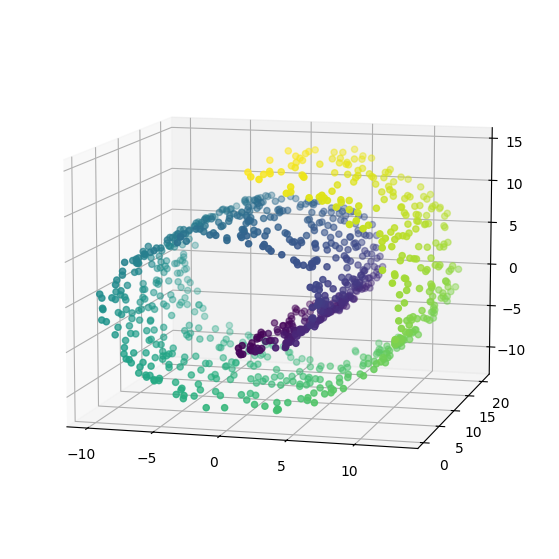

In [2]:
from sklearn.datasets import make_swiss_roll
import numpy as np
import matplotlib.pyplot as plt

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
#t contiene el orden estructural de los datos
#crear scatter en 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

**NOTA:** PCA supone que el conjunto de datos se centra en el origen. Como veremos, las clases de PCA de Scikit-Learn se encargan de centrar los datos por usted. Sin embargo, si implementa PCA usted mismo, o si usa otras bibliotecas, **no olvide centrar los datos primero**, incluso considere aplicar normalización zscore.

**Usando PCA de scikit-learn**

-La clase PCA de Scikit-Learn implementa PCA usando la descomposición espectral (EIG y SVD).

-El siguiente código aplica PCA para reducir la dimensionalidad del conjunto de datos a dos dimensiones (tenga en cuenta que automáticamente se encarga de centrar los datos):

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
Y2D = pca.fit_transform(X)

- El hiperparámetro `n_components` puede ser un número entero (número de dimensiones o componentes $M\leq P$) o un valor en el intervalo [0,1] para cuantificar el número de componentes requerido para preservar una varianza retenida dada.

Tenga en cuenta que ejecutar PCA varias veces en conjuntos de datos ligeramente diferentes puede generar espacios latentes distintos. En general, la única diferencia es que algunos ejes pueden voltearse.

**Nota**: el problema de optimización de PCA que incluye costo y restricciones cuadráticas, da como resultado un problema no convexo.

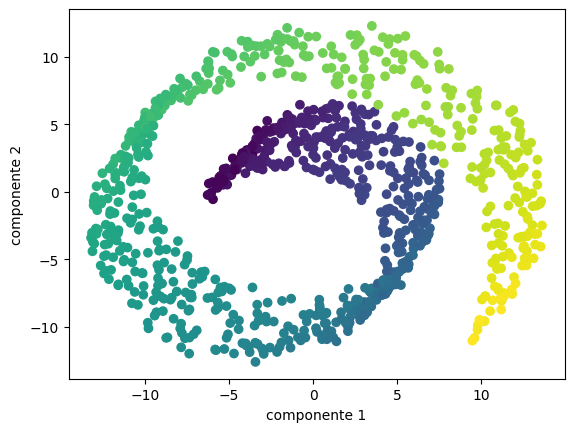

In [4]:
plt.scatter(Y2D[:,0],Y2D[:,1],c=t)
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.show()

Ahora vamos a recuperar los puntos 3D proyectados en el plano (subespacio PCA 2D).

In [5]:
X3D_inv = pca.inverse_transform(Y2D)

Por supuesto, **hubo cierta pérdida de información durante el paso de proyección**, por lo que los puntos 3D recuperados *no son exactamente iguales a los puntos 3D originales*:

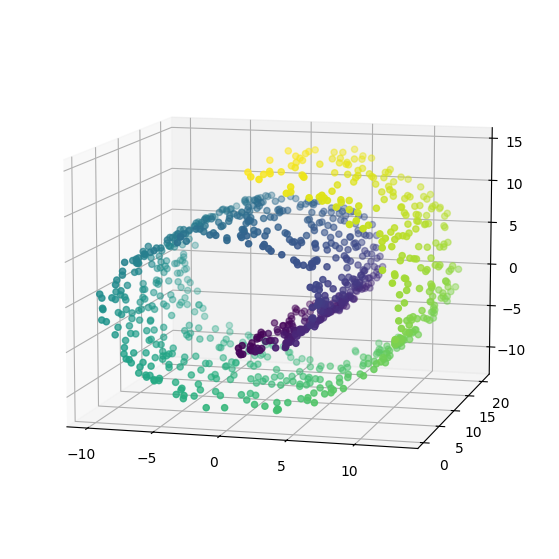

In [6]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

Podemos calcular el error de reconstrucción:

In [7]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

np.float64(4.751275566890726e-29)

Las reconstrucciones de ambos métodos **no son idénticas** porque la clase PCA de Scikit-Learn se encarga automáticamente de revertir el centrado medio, *pero si restamos la media, obtenemos la misma reconstrucción*.

El objeto PCA da acceso a los componentes principales que calculó:

In [8]:
pca.components_

array([[ 0.56791312,  0.15670748,  0.80803308],
       [ 0.77712377,  0.2213858 , -0.5891239 ],
       [-0.27120717,  0.96251291,  0.00394679]])

# Ejercicio 1

- Presente el problema de optimización de PCA como un algoritmo generativo (reconstrucción o filtrado de datos), y compare el problema de optimización desde el punto de vista generativo vs. preservación de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).



### Varianza retenida (explicada)

- El valor propio relacionado con cada compoenente, codifica la varianza retenida del espacio de entrada.

Por ejemplo, veamos las razones de varianza explicadas de los dos primeros componentes del conjunto de datos 3D representados

In [9]:
pca.explained_variance_ratio_

array([0.40782396, 0.3020019 , 0.29017414])


Esto le indica que **el 40.8% de la varianza del conjunto de datos se encuentra a lo largo del primer eje**, y el **30.2% se encuentra a lo largo del segundo eje**.

### Determinar el número de dimensiones proyectas

El siguiente código calcula PCA sin reducir la dimensionalidad, luego calcula el número mínimo de dimensiones requeridas para preservar el 95% de la variación del conjunto de entrenamiento (se utilizará la base de datos Mnist que tiene 784 dimensiones de entrada).

In [10]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1)/255.
y = y_train

print(X.shape,y.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784) (60000,)


In [11]:
#se submuestrea para facilidad en cálculos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.98,random_state=123)
print(X_train.shape,y_train.shape)

(1200, 784) (1200,)


In [12]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d      = np.argmax(cumsum >= 0.95) + 1 #varianza acumulada ordenando componentes
d

np.int64(135)

También podemos establecer *n_components = d* y ejecutar PCA nuevamente. Sin embargo, hay una opción mucho mejor: en lugar de especificar el número de componentes principales que desea conservar, puede establecer *n_components* para que sea flotante entre 0.0 y 1.0, lo que indica la relación de varianza que desea conservar:

In [13]:
pca       = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

In [14]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9503404973326779)

- Otra opción más es **trazar la varianza explicada en función del número de dimensiones** (simplemente trazar *cumsum*; ver Figura a continuación).

- Por lo general, habrá un codo en la curva, donde la variación explicada deja de crecer rápidamente. Puede pensar en esto como la dimensionalidad intrínseca del conjunto de datos.

- En este caso, puede ver que reducir la dimensionalidad a unas 100 dimensiones no perdería demasiada varianza explicada.

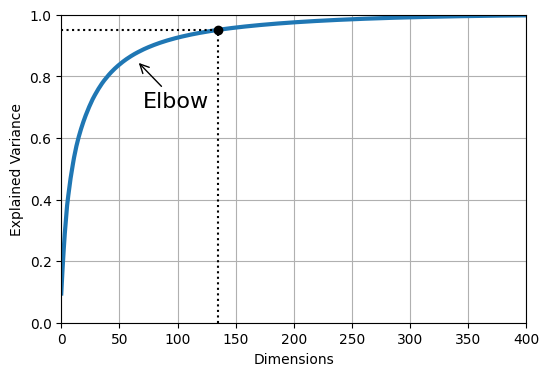

In [15]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

### PCA para compresión de datos

 **Ejemplo:** intentemos aplicar PCA al conjunto de datos MNIST mientras conserva el $95\%$ de su varianza.

Debería encontrar que cada instancia tendrá un poco más de $150$ características, en lugar de las características $784$ originales.

In [16]:
pca       = PCA(n_components=0.95)
X_train = np.array(X_train)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

- Entonces, aunque se conserva la mayor parte de la variación, ¡el conjunto de datos ahora es inferior al $20\%$ de su tamaño original!.

- Esta es una relación de compresión razonable, y podemos ver cómo esto puede acelerar enormemente un algoritmo de clasificación (como un clasificador SVM).

**Ejemplo:** En el siguiente código se comprime el conjunto de datos MNIST a $154$ dimensiones, luego usa el método *inverse_transform()* para descomprimirlo nuevamente a $784$ dimensiones. La  siguiente Figura muestra algunos dígitos del conjunto de entrenamiento original (a la izquierda) y los dígitos correspondientes después de la compresión y descompresión. Puede ver que hay una ligera pérdida de calidad de imagen, pero los dígitos aún están casi intactos.

(30, 784)
(30, 784)


Text(0.5, 1.0, 'Compressed')

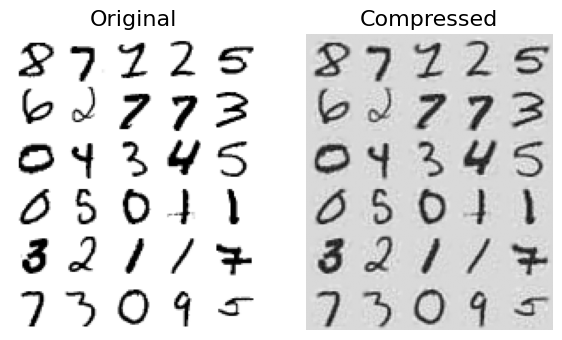

In [17]:
import matplotlib as mpl

pca         = PCA(n_components = 154)
X_reduced   = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size           = 28
    images_per_row = min(len(instances), images_per_row)
    print(instances.shape)
    images         = [instance.reshape(size,size) for instance in instances]
    n_rows         = (len(instances) - 1) // images_per_row + 1
    row_images     = []
    n_empty        = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::40])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::40])
plt.title("Compressed", fontsize=16)
#save_fig("mnist_compression_plot")

In [18]:
rnd_pca   = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA

- El algoritmo Kernel PCA permite calcular los componentes principales a partir de un mapeo no lineal basado en funciones núcleo.

- En KPCA los datos en $\mathbf{X}$ son mapeados a un espacio de alta dimensión desde la función $\phi: \mathbb{R}^P \to \mathscr{F}$.

- Luego, se encuentran los componentes principales sobre la matriz kernel $\mathbf{K}\in \mathbb{R}^{N \times N}$, con $K_{nn'} = \kappa(\mathbf{x}_n,\mathbf{x}_{n'})=\langle \phi(\mathbf{x}_n),\phi(\mathbf{x}_{n'})\rangle$.


\begin{equation}
\mathbf{K} \boldsymbol{\alpha} = \lambda \boldsymbol{\alpha},
\end{equation}


- Para encontrar la proyección de los datos:

\begin{equation}
\mathbf{z}_n = \sum_{n'=1}^N \alpha_{n'} \kappa(\mathbf{x}_n, \mathbf{x}_{n'}), \quad n = 1, 2, \ldots, N,
\end{equation}






# Ejercicio 2

- Presente un paralelo entre el problema de optimización de PCA y el de Kernel PCA.


**Ejemplo:** el siguiente código utiliza la clase *KernelPCA* de Scikit-Learn para realizar kPCA con un kernel RBF.

- Se utilizará el swiss-roll para facilitar la visualización.

In [19]:
from sklearn.decomposition import KernelPCA

#se ilustra nuevamente sobre swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


rbf_pca   = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

- Ahora se comparan tres kernels distintos para encontrar la proyección de los datos:

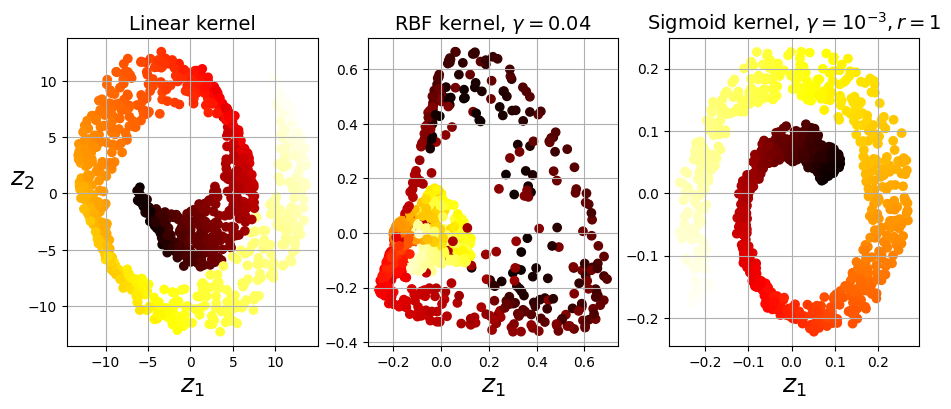

In [20]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
#save_fig("kernel_pca_plot")
plt.show()

La Figura muestra el rollo suizo, reducido a dos dimensiones usando un núcleo lineal (equivalente a simplemente usar la clase *PCA*), un núcleo RBF y un núcleo sigmoide (Logístico).

### kPCA: Definiendo el kernel y sus hiperparámetros

- Como kPCA es un algoritmo de aprendizaje no supervisado, *no existe una medida de rendimiento obvia para ayudarlo a seleccionar los mejores valores de kernel e hiperparámetros*.

- Sin embargo, la reducción de dimensionalidad es a menudo un paso de preparación para una tarea de aprendizaje supervisada (por ejemplo, clasificación), por lo que simplemente puede usar la **búsqueda de cuadrícula** para seleccionar el núcleo y los hiperparámetros conducen al mejor rendimiento en esa tarea.

**Ejemplo:** el siguiente código crea una guía de dos pasos para la clasificación de la base de datos Mnist.

- Primero reduciendo la dimensionalidad a dos dimensiones usando kPCA, luego aplicando Regresión logística para la clasificación.

- Se utiliza *GridSearchCV* para encontrar el mejor valor de kernel y gamma para kPCA para obtener la mejor precisión de clasificación al final de la guía:

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

Los mejores kernels e hiperparámetros están disponibles a través de la variable *best_params_*:

In [22]:
print(grid_search.best_params_)

{'kpca__gamma': np.float64(0.03), 'kpca__kernel': 'rbf'}


**Tal vez se pregunte cómo realizar la reconstrucción de una instancia proyectada con kPCA?**.

- Una solución es entrenar un modelo de regresión supervisado, con las instancias proyectadas como el conjunto de entrenamiento y las instancias originales como los objetivos.

- Scikit-Learn lo hará automáticamente si configura *fit_inverse_transform = True*, ([pre-image problem](https://www.aaai.org/Papers/ICML/2003/ICML03-055.pdf)) como se muestra en el siguiente código:

In [23]:
from sklearn.metrics import mean_squared_error

rbf_pca    = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced  = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X, X_preimage)

32.7863087957661

Podemos usar GridSearchCV para encontrar el núcleo y los hiperparámetros que minimizan este error de reconstrucción pre-imagen.

## t-distributed stochastic neighborhood embedding

- [t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwA) es de los algoritmos más potentes en reducción de dimensión dado que permite unir los principios de manifold learning y probabilidades, para lidear con el problema de concentración de las normas (métricas en espacios de alta dimensión se distribuyen muy diferente a métricas en espacios de baja dimensión).


![gifpca](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)



- t-SNE busca minimizar la diferencia entre las funciones de probabilidad del espacio original (alta dimensión) y el espacio reducido (baja dimensión), evitando el problema de la concentración de la norma.


- La similitud es modelada como una distribución Gaussiana, tal que la probabilidad condicional $p_{n'|n}$ que define si  $\mathbf{x}_n$ selecciona a $\mathbf{x}_{n'}$ como su vecino es:

\begin{equation}
p_{n'|n} = \frac{\exp(-\|\mathbf{x}_n - \mathbf{x}_{n'}\|^2 / 2\sigma_n^2)}{\sum_{k \neq n} \exp(-\|\mathbf{x}_n - \mathbf{x}_k\|^2 / 2\sigma_n^2)},
\end{equation}

donde $\sigma_n\in \mathbb{R}^+$.

La probabilidad conjunta se puede definir como :

\begin{equation}
p_{nn'} = \frac{p_{n'|n} + p_{n|n'}}{2N}.
\end{equation}



- Para el espacio de baja dimensión se utiliza un distribución t-Student con un grado de libertad (distribución de Cauchy).

- La probabilidad conjunta $q_{nn'}$ que modela si $\mathbf{y}_n$ y $\mathbf{z}_{n'}$ están cercanos es dada por:

\begin{equation}
q_{nn'} = \frac{(1 + \|\mathbf{z}_n - \mathbf{z}_{n'}\|^2)^{-1}}{\sum_{k \neq l} (1 + \|\mathbf{z}_k - \mathbf{z}_l\|^2)^{-1}}.
\end{equation}


- t-SNE minimiza la divergencia de  Kullback-Leibler (KL) entre $P = \{p_{nn'}\}$ y $Q = \{q_{nn'}\}$:

\begin{equation}
\text{KL}(P \| Q) = \sum_{n \neq n'} p_{nn'} \log \left( \frac{p_{nn'}}{q_{nn'}} \right).
\end{equation}

- La minización se resuelve convencionalmente por métodos de gradiente.

- Es importante resaltar que el ancho de bando en el espacio de alta dimensión se fija por muestra, fijando un valor de entropia común (perplexity).




In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity= 20, random_state=42,init='pca')
X_reduced_tsne = tsne.fit_transform(X)

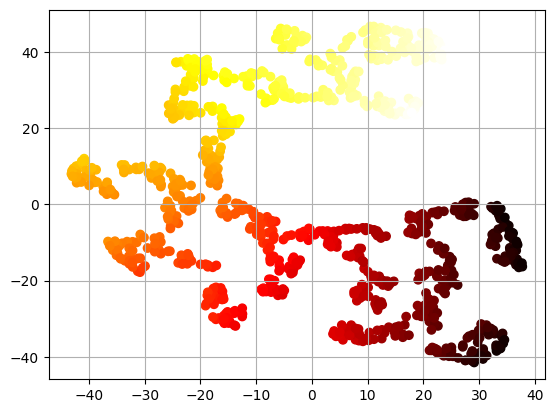

In [25]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


## Uniform Manifold Approximation and Projection (UMAP)

![gifumap](https://umap-learn.readthedocs.io/en/latest/_images/aligned_umap_pendigits_anim.gif)

- UMAP es una técnica de reducción de dimensión que modela el espacio de alta dimensión como estructura topológica difusa y la optimiza en el espacio de baja dimensión preservando distancias globales y locales.

- UMAP construye un grafo ponderado para representar la estructura topológica difusa.

- La probabilidad $p_{nn'}$ que representa el peso del borde entre $\mathbf{x}_n$ and $\mathbf{x}_{n'}$ esta dada por:

\begin{equation}
p_{nn'} = \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_{n'}\| - \rho_n}{\sigma_n}\right),
\end{equation}

- $\rho_n$ es la distancia al vecino más cercano de $\mathbf{x}_n$, lo que asegura que las distancias locales no se ven afectadas por ruido.
    
- $\sigma_n$ se determina por una un número fijo de vecinos.


- La relación difusa se vuelve simétrica como:

\begin{equation}
\tilde{p}_{nn'} = p_{nn'} + p_{n'n} - p_{nn'} p_{n'n}.
\end{equation}



- Las relaciones en el espacio de baja dimensión se fijan mediante una distribución t-student de cola pesada:

\begin{equation}
q_{nn'} = \left(1 + a \|\mathbf{z}_n - \mathbf{z}_{n'}\|^{2b}\right)^{-1},
\end{equation}

con $a$ y $b$ como parámetros de la distribución. Generalmente se fijan en 1.


- UMAP minimiza la entropía cruzada :

\begin{equation}
C(P;Q) = \sum_{n \neq n'} \left( -\tilde{p}_{nn'} \log(q_{nn'}) - (1 - \tilde{p}_{nn'}) \log(1 - q_{nn'}) \right).
\end{equation}

- Convencionalmente se utilizan métodos de gradiente para resolver la optimización.

In [26]:
!pip install umap-learn #librería umap
!pip install datashader bokeh holoviews #gráficos umap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 73.2 MB/s eta 0:00:00


In [27]:
import umap
import umap.plot

/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.11/dist-packages/numba/np/ufunc/dufunc.py:343: NumbaWarning: Compilation requested for previously compiled argument types ((uint32,

In [28]:
red = umap.UMAP(n_components=2,n_neighbors=40, min_dist=0.2)
X_reduced_umap = red.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


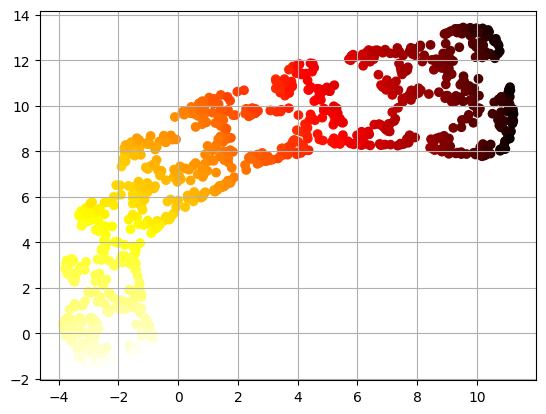

In [29]:
plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


- UMAP presenta una serie de métodos para [gráficos interactivos](https://umap-learn.readthedocs.io/en/latest/plotting.html)

<Axes: >

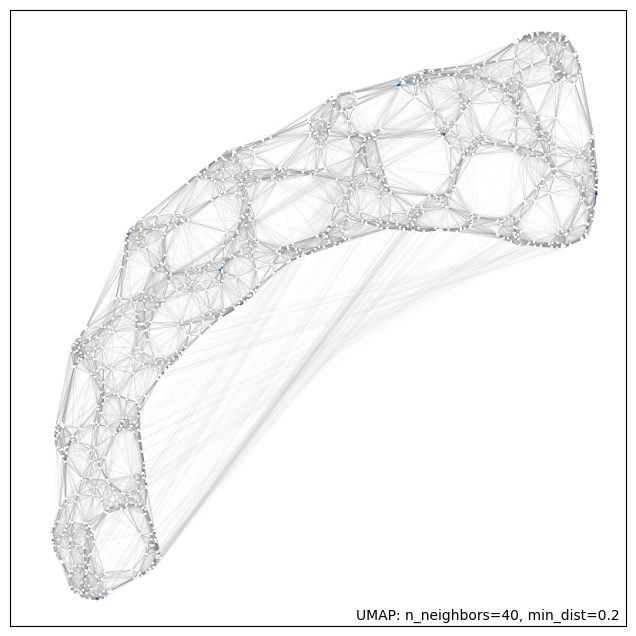

In [30]:
umap.plot.connectivity(red, show_points=True)

/usr/local/lib/python3.11/dist-packages/umap/plot.py:895: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

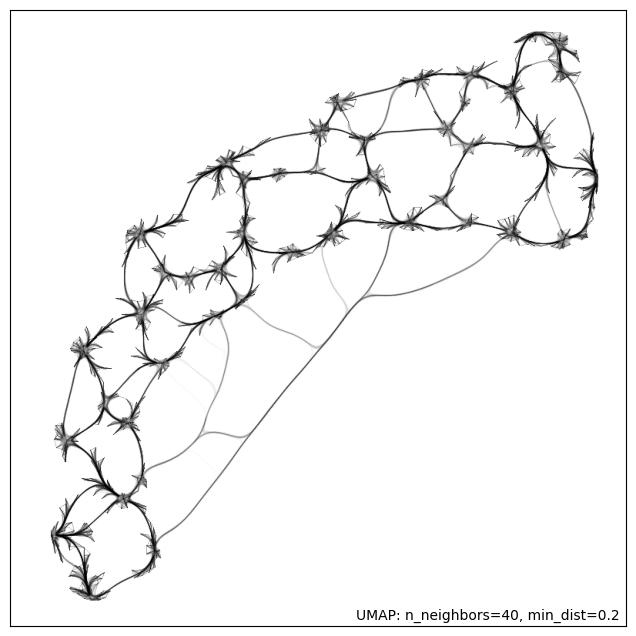

In [31]:
umap.plot.connectivity(red, edge_bundling='hammer')

# Ejercicio 3



1.  Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.

2. Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos, en caso de estar disponibles.


In [32]:
#Ayuda de código
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)


In [33]:
#graficar 2D con imágenes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#img_w y img_h representan la resolución original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

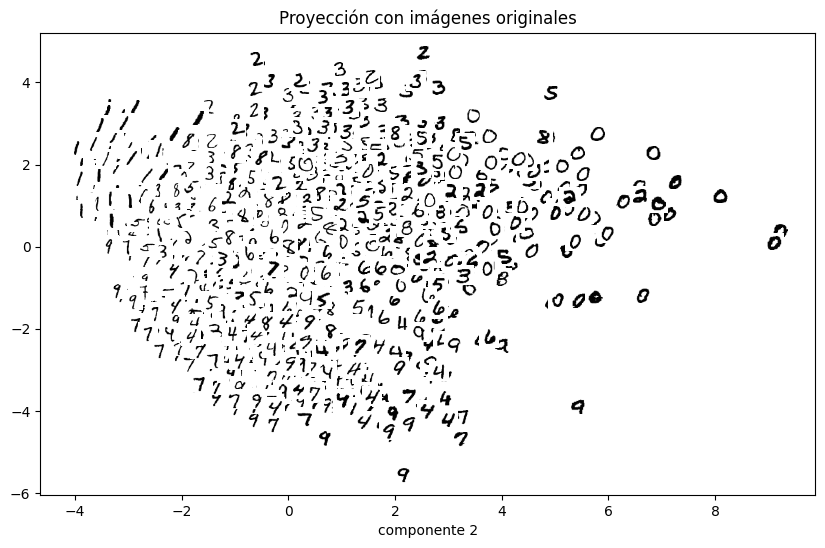

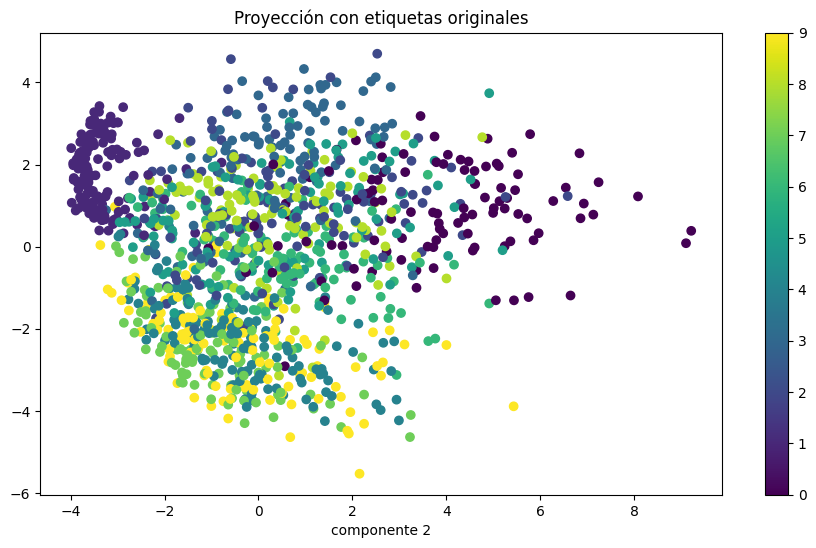

In [34]:
plot_mnist_2d(Z,X_train,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con imágenes originales')
plt.show()

plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con etiquetas originales')
plt.colorbar()
plt.show()

In [35]:
#graficar componentes como "eigenfaces"
print(red.components_.shape)


(80, 784)


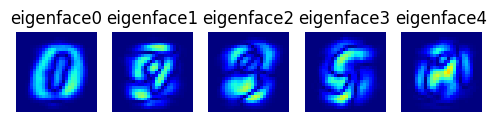

In [36]:
n_rows = 1
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
#resolución imagenes
img_w = 28
img_h = 28

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(abs(red.components_[index].reshape(img_w,img_h)),
                    vmin=abs(red.components_).min(), vmax=abs(red.components_).max(),cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("eigenface" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

# **Ejercicio 1**

- Presente el problema de optimización de PCA como un algoritmo generativo (reconstrucción o filtrado de datos), y compare el problema de optimización desde el punto de vista generativo vs. preservación de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).


El Principal Component Analysis (PCA) puede entenderse desde dos perspectivas principales en cuanto a su problema de optimización: una como un algoritmo generativo (reconstrucción/filtrado de datos) y la otra como un método de preservación de la varianza. Ambas perspectivas, si bien son equivalentes en sus resultados, ofrecen diferentes intuiciones sobre lo que PCA logra.

## **PCA como Algoritmo Generativo (Reconstrucción o Filtrado de Datos)**

Desde el punto de vista generativo, PCA busca encontrar un subespacio de menor dimensión tal que la proyección de los datos originales en este subespacio y su posterior reconstrucción minimicen el error de reconstrucción. El objetivo es que los datos reconstruidos ($\hat{X}_n$) sean lo más parecidos posible a los datos originales ($X_n$).

Considerando el material de apoyo (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)), el problema de optimización se formula como:

$$\min_{W} \mathbb{E}_{x} \left\| X_n - \hat{X}_n \right\|^2$$

Donde:
* $X_n$ son los datos originales.
* $\hat{X}_n$ son los datos reconstruidos.
* $W$ es la matriz de transformación que mapea los datos al subespacio de menor dimensión y viceversa.

Sabemos que la reconstrucción $\hat{X}_n$ se define como $\hat{X}_n = Z_n W^T$, donde $Z_n = X_n W$. Sustituyendo esto en la expresión:

$$\min_{W} \mathbb{E}_{x} \left\| X_n - X_n W W^T \right\|^2$$

Expandiendo el término de la norma al cuadrado, tenemos:

$$\mathbb{E}_{x} \left\langle X_n - Z_n W^T, X_n - Z_n W^T \right\rangle$$

$$= \mathbb{E}_{x} \left\{ X_n X_n^T - 2 X_n (Z_n W^T)^T + Z_n W^T (Z_n W^T)^T \right\}$$

$$= \mathbb{E}_{x} \left\{ X_n X_n^T - 2 X_n W W^T X_n^T + X_n W W^T W W^T X_n^T \right\}$$

Asumiendo que las columnas de $W$ son ortonormales, es decir, $W^T W = I$, la expresión se simplifica a:

$$\mathbb{E}_{x} \left\{ X_n X_n^T - 2 X_n W W^T X_n^T + X_n W W^T X_n^T \right\}$$

$$= \mathbb{E}_{x} \left\{ X_n X_n^T - X_n W W^T X_n^T \right\}$$

Para minimizar esta expresión, dado que $\mathbb{E}_{x} \{X_n X_n^T\}$ es una constante (la matriz de covarianza de los datos), el problema de minimización del error de reconstrucción se convierte en:

$$\min_{W} \mathbb{E}_{x} \left\{ X_n X_n^T \right\} - \mathbb{E}_{x} \left\{ X_n W W^T X_n^T \right\}$$

Lo cual es equivalente a:

$$\max_{W} \mathbb{E}_{x} \left\{ X_n W W^T X_n^T \right\}$$

Este es el problema de optimización desde el punto de vista generativo. Se busca encontrar la matriz $W$ que maximice la "proyección" de los datos originales de vuelta al espacio original, es decir, que maximice la cantidad de información (varianza) capturada por la reconstrucción.



## **PCA como Preservación de la Varianza**

El problema de optimización desde el punto de vista de preservación de la varianza se formula como la maximización de la varianza de los datos proyectados:

$$\max_{W} \mathbb{E}_{x} \left\{ Z_n Z_n^T \right\}$$

Donde $Z_n = X_n W$. Sustituyendo esto y representando la esperanza de $X_n^T X_n$ como la matriz de covarianza $\tilde{\Sigma}_x$:

$$\max_{W} W^T \tilde{\Sigma}_x W$$

Esta maximización está sujeta a la restricción de ortonormalidad de las columnas de $W$:

$$W^T W = I$$

Para resolver este problema, se utiliza el método de los multiplicadores de Lagrange. La función Lagrangiana es:

$$L(W, \lambda) = W^T \tilde{\Sigma}_x W - \lambda (W^T W - I)$$

Derivando con respecto a $W$ e igualando a cero, obtenemos la ecuación de valores y vectores propios:

$$\tilde{\Sigma}_x W = \lambda W$$

Aquí, $W$ representa los vectores propios de la matriz de covarianza $\tilde{\Sigma}_x$, y $\lambda$ son los valores propios correspondientes. Para maximizar la varianza, se seleccionan los $k$ vectores propios asociados a los $k$ valores propios más grandes.

# Ejercicio 2

- Presente un paralelo entre el problema de optimización de PCA y el de Kernel PCA.

Tanto el PCA como el Kernel PCA (KPCA) buscan la reducción de dimensionalidad, pero lo hacen de maneras fundamentalmente diferentes, lo que se refleja directamente en sus problemas de optimización. La clave está en cómo manejan la linealidad y la no linealidad en los datos.

Se presenta un paralelo entre sus problemas de optimización:

## **Comparación: Problemas de Optimización de PCA vs. Kernel PCA**



| Característica            | PCA (Principal Component Analysis)                                 | Kernel PCA (KPCA)                                                         |
| :------------------------ | :----------------------------------------------------------------- | :------------------------------------------------------------------------ |
| **Naturaleza** | Lineal                                                             | No lineal (via "kernel trick")                                            |
| **Espacio de Operación** | Espacio de datos original                                          | Espacio de características transformado implícitamente por el kernel      |
| **Objetivo** | Maximizar la varianza en las proyecciones lineales.                | Maximizar la varianza en las proyecciones no lineales (en el espacio kernel). |
| **Matriz Clave** | Matriz de Covarianza ($\tilde{\Sigma}_x$) de los datos originales. | Matriz Kernel ($\mathbf{K}$) de similitudes entre pares de puntos.        |
| **Problema de Optimización (Maximización de Varianza)** | $\max_{W} W^T \tilde{\Sigma}_x W$ <br> Sujeto a $W^T W = I$ | $\max_{\boldsymbol{\alpha}} \boldsymbol{\alpha}^T \mathbf{K} \boldsymbol{\alpha}$ <br> Sujeto a $\boldsymbol{\alpha}^T \mathbf{K} \boldsymbol{\alpha} = 1$ |
| **Solución** | Vectores propios de $\tilde{\Sigma}_x$.                            | Vectores propios de $\mathbf{K}$.                                         |
| **Ecuación Eigenvalue** | $\tilde{\Sigma}_x \mathbf{w} = \lambda \mathbf{w}$                 | $\mathbf{K} \boldsymbol{\alpha} = \lambda n \boldsymbol{\alpha}$ (aprox. y dependiente del centrado/normalización) |
| **Manejo de No Linealidad** | No puede capturar relaciones no lineales.                          | Capaz de capturar relaciones no lineales complejas.                       |
| **Ventaja Principal** | Eficiente, interpretable.                                          | Captura estructuras no lineales.                                          |
| **Desventaja Principal** | Solo lineal.                                                       | Computacionalmente más costoso (matriz $N \times N$), menos interpretable en el espacio original. |

### **Explicación Adicional sobre la Matriz Kernel ($\mathbf{K}$):**

En KPCA, en lugar de calcular la matriz de covarianza de los datos originales $\tilde{\Sigma}_x$, se construye la **matriz Kernel** $\mathbf{K}$. Esta matriz contiene los productos internos entre todos los pares de puntos de datos *en el espacio de características transformado* $\Phi(\mathbf{x})$. El "Kernel Trick" nos permite calcular estos productos internos usando una función kernel $\kappa(\mathbf{x}_i, \mathbf{x}_j)$ sin necesidad de conocer explícitamente la transformación $\Phi(\cdot)$. La relación clave es:

$$K_{ij} = \kappa(\mathbf{x}_i, \mathbf{x}_j) = \langle \Phi(\mathbf{x}_i), \Phi(\mathbf{x}_j) \rangle$$

Una vez que se tiene la matriz Kernel (centrada), el problema de optimización en el espacio de características se reduce a una eigendecomposición de $\mathbf{K}$. Los vectores propios resultantes de $\mathbf{K}$ ($\boldsymbol{\alpha}$) no son directamente las componentes principales en el espacio de características, sino los coeficientes que, cuando se combinan con los datos mapeados por $\Phi(\mathbf{x})$, forman las componentes principales en ese espacio.

# **Ejercicio 3**
 Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.



###**Algoritmo Eigenfaces**
El algoritmo **Eigenfaces** es una técnica de reconocimiento facial que se basa en la idea de que los rostros humanos pueden ser representados de manera eficiente como una combinación lineal de un conjunto de "rostros propios" o "eigenfaces". Fue desarrollado por Matthew Turk y Alex Pentland en 1991.

En esencia, Eigenfaces aplica el **Principal Component Analysis (PCA)** a un conjunto de imágenes de rostros para encontrar los componentes principales de la varianza en los datos de los rostros. Estos componentes principales, cuando se visualizan como imágenes, se ven como patrones de rostro (a menudo borrosos o fantasmas) y son lo que se conoce como "eigenfaces".

### ¿En qué consiste el algoritmo Eigenfaces?

El proceso general del algoritmo Eigenfaces se puede resumir en los siguientes pasos:

1.  **Preparación del conjunto de entrenamiento:**
    * Se recopila una base de datos de imágenes de rostros de diferentes personas. Es crucial que las imágenes estén normalizadas (misma escala, alineación, iluminación, etc.) para que el algoritmo funcione eficazmente.
2.  **Vectorización de las imágenes:**
    * Cada imagen de rostro (una matriz de píxeles) se convierte en un vector largo concatenando todas sus filas o columnas de píxeles. Si una imagen es de $N \times M$ píxeles, se convierte en un vector de $N \times M$ dimensiones.
3.  **Cálculo del rostro promedio:**
    * Se calcula el vector promedio de todos los vectores de rostro en el conjunto de entrenamiento. Este "rostro promedio" ($\Psi$) representa la cara central de todos los rostros en la base de datos.
4.  **Sustracción del rostro promedio:**
    * Cada vector de rostro individual se le resta el rostro promedio. Esto produce un conjunto de "rostros desviados" o "diferencias con el promedio" ($\Phi_i = \mathbf{x}_i - \Psi$), que son la base para calcular la matriz de covarianza.
5.  **Construcción de la matriz de covarianza:**
    * Se construye la matriz de covarianza $S$ de los rostros desviados. Esta matriz es generalmente muy grande (dimensiones de (número de píxeles) x (número de píxeles)).
    * Para conjuntos de imágenes grandes, la matriz de covarianza puede ser demasiado grande para manejar directamente. En lugar de calcular $S = \sum_{i=1}^P \Phi_i \Phi_i^T$, a menudo se utiliza una técnica alternativa para encontrar los autovectores de $A^T A$ (donde $A$ es la matriz cuyas columnas son los $\Phi_i$), que son relacionados con los autovectores de $A A^T$.
6.  **Cálculo de los Eigenfaces (vectores propios):**
    * Se calculan los vectores propios y valores propios de la matriz de covarianza. Los vectores propios con los valores propios más grandes corresponden a las direcciones de mayor variabilidad en el espacio de los rostros. Estos vectores propios son los "eigenfaces".
7.  **Proyección en el espacio de Eigenfaces:**
    * Una vez que se han obtenido los $k$ eigenfaces principales, cada rostro (tanto del conjunto de entrenamiento como uno nuevo a reconocer) puede ser proyectado en el espacio de eigenfaces. Esto se hace restando el rostro promedio y luego tomando el producto punto con cada eigenface. El resultado es un vector de "pesos" o "coeficientes" que representa el rostro en el espacio de menor dimensión.
8.  **Reconocimiento:**
    * Para reconocer un nuevo rostro, se proyecta en el espacio de eigenfaces para obtener su vector de pesos. Luego, se compara este vector de pesos con los vectores de pesos de los rostros conocidos en la base de datos (por ejemplo, usando distancia euclidiana). La persona más cercana en el espacio de eigenfaces es la identificación.

### **Comparación del Modelo de Eigenfaces para Reducción de Dimensión con el Algoritmo PCA**
Es crucial entender que **Eigenfaces es una aplicación específica de PCA**, no un algoritmo completamente diferente en términos de su núcleo matemático de reducción de dimensión. La comparación reside en el contexto y la interpretación.

| Característica        | Algoritmo PCA (General)                                         | Algoritmo Eigenfaces (Aplicación de PCA)                                |
| :-------------------- | :-------------------------------------------------------------- | :---------------------------------------------------------------------- |
| **Objetivo Principal** | Reducción de la dimensionalidad, extracción de características, visualización de datos. | Reconocimiento y verificación facial.                                   |
| **Tipo de Datos** | Aplica a cualquier tipo de datos numéricos multidimensionales.  | Específicamente diseñado para imágenes de rostros.                      |
| **Matemáticas Subyacentes** | Eigendecomposición de la matriz de covarianza (o SVD).        | Exactamente las mismas matemáticas de PCA, aplicadas a datos de imágenes de rostros. |
| **Resultado de la Reducción** | **Componentes Principales (PCs):** Vectores abstractos que capturan la varianza. | **Eigenfaces:** Vectores propios visualizados como "rostros" (patrones de variabilidad facial). |
| **Interpretación de los Componentes** | Las PCs son combinaciones lineales de las características originales. Su significado depende del dominio del problema. | Los Eigenfaces representan las variaciones fundamentales entre los rostros en el conjunto de entrenamiento (ej. variaciones en los ojos, nariz, boca, forma general). |
| **Fase de Entrenamiento** | Identifica las direcciones de mayor varianza en los datos.      | Identifica las variaciones más significativas entre un conjunto de rostros para crear una base de "rostros estándar". |
| **Fase de Prueba/Aplicación** | Proyección de nuevos datos en el subespacio de menor dimensión. | Proyección de un nuevo rostro en el espacio de Eigenfaces para obtener sus "pesos" característicos y compararlo con rostros conocidos. |
| **Sensibilidad** | Sensible a la escala de las características y a los valores atípicos. | Muy sensible a la alineación, iluminación, expresión y escala de las imágenes de rostros. Requiere preprocesamiento riguroso. |

Entonces, Eigenfaces es simplemente PCA aplicado al dominio específico de las imágenes de rostros. Utiliza la capacidad de PCA para encontrar un subespacio de menor dimensión que capture la mayor variabilidad de un conjunto de datos. En el contexto de los rostros, esta variabilidad se traduce en los "eigenfaces", que son las bases para la representación y el reconocimiento facial eficiente.

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Importaciones generales (ya no se usarán directamente para los algoritmos, solo para datos y métricas)
import time
from sklearn.metrics import silhouette_score # silhouette_score es de sklearn y funciona en CPU
import tensorflow as tf # Para cargar MNIST
from tensorflow import keras

In [38]:
# 1. Cargar y preparar los datos MNIST
mnist = keras.datasets.mnist
(X_train_raw, y_train) = mnist.load_data()[0] # Solo necesitamos X_train y y_train

# Normalizar y aplanar las imágenes para PCA
# Aplanamos cada imagen de 28x28 a un vector de 784 dimensiones
X_train_flat = X_train_raw.reshape(X_train_raw.shape[0], -1) / 255.

print(f"Forma de X_train (datos originales): {X_train_raw.shape}")
print(f"Forma de X_train_flat (datos aplanados y normalizados para PCA): {X_train_flat.shape}")
print(f"Forma de y_train (etiquetas): {y_train.shape}")

Forma de X_train (datos originales): (60000, 28, 28)
Forma de X_train_flat (datos aplanados y normalizados para PCA): (60000, 784)
Forma de y_train (etiquetas): (60000,)



Número de componentes seleccionadas por PCA (para 90% de varianza): 87
Forma de los datos proyectados Z: (60000, 87)
Varianza explicada total por las componentes seleccionadas: 0.9001


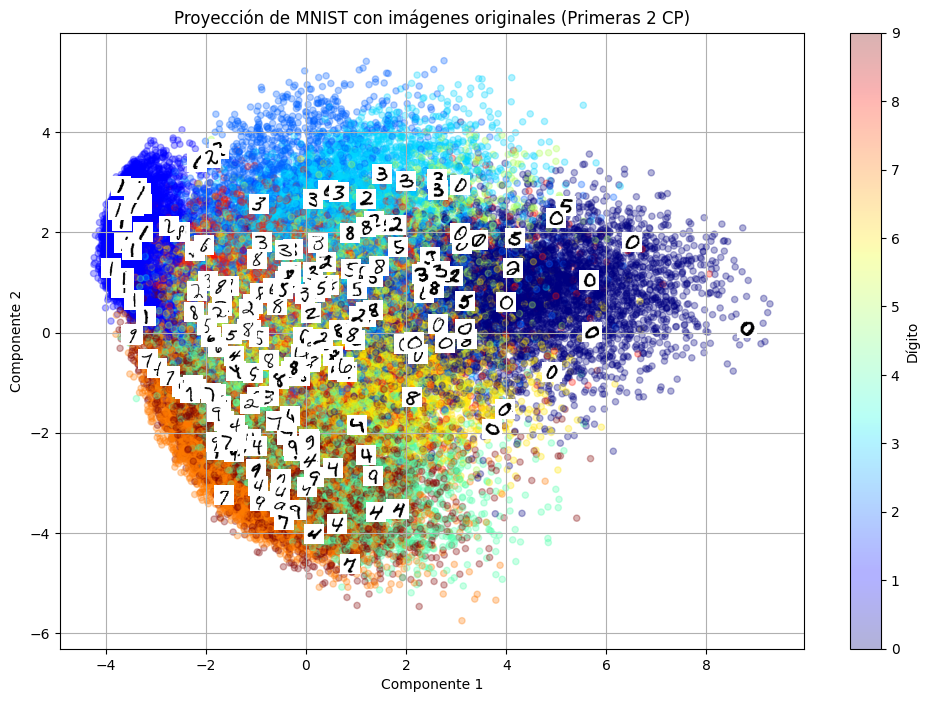

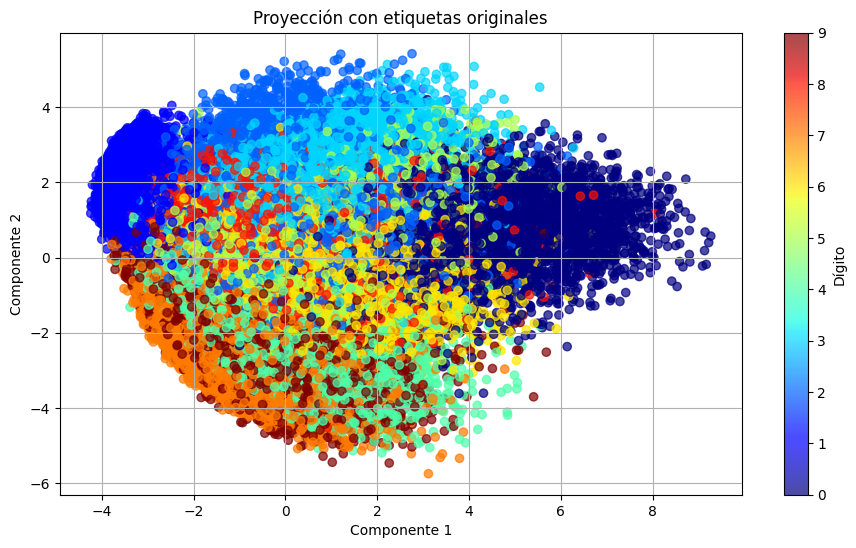


Forma de las componentes principales (eigenfaces): (87, 784)


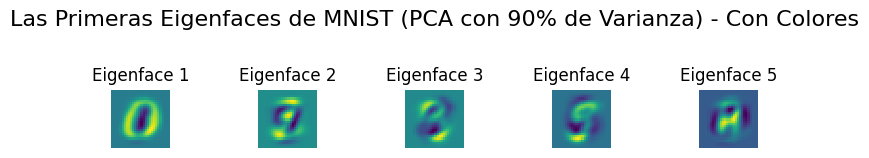

In [39]:
# 2. Aplicar PCA (Eigenfaces) para retener el 90% de la varianza
# n_components=0.9 significa que PCA seleccionará el número de componentes
# necesarias para explicar el 90% de la varianza.
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train_flat) # Aplicamos PCA a los datos aplanados

print(f"\nNúmero de componentes seleccionadas por PCA (para 90% de varianza): {red.n_components_}")
print(f"Forma de los datos proyectados Z: {Z.shape}")
print(f"Varianza explicada total por las componentes seleccionadas: {red.explained_variance_ratio_.sum():.4f}")

# 3. Función para graficar 2D con imágenes originales sobre los puntos
# Hemos modificado la función para controlar el número de imágenes a graficar
# para evitar que el gráfico esté demasiado saturado.
def plot_mnist_2d_with_images(Z_data, images, img_w=28, img_h=28, zoom=0.5, cmap='binary', num_images_to_display=200):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlabel('Componente 1')
    ax.set_ylabel('Componente 2')
    ax.set_title('Proyección de MNIST con imágenes originales (Primeras 2 CP)')
    ax.grid(True)

    # Seleccionar un subconjunto aleatorio de índices para mostrar imágenes
    np.random.seed(42) # Para reproducibilidad
    display_indices = np.random.choice(Z_data.shape[0], num_images_to_display, replace=False)

    # Graficar un scatter plot con las etiquetas para dar contexto (opcional, pero útil)
    # Aquí estamos usando las etiquetas originales (y_train) para colorear los puntos
    # aunque las imágenes superpuestas serán solo una muestra.
    scatter = ax.scatter(Z_data[:, 0], Z_data[:, 1], c=y_train, cmap='jet', alpha=0.3, s=20)
    plt.colorbar(scatter, label='Dígito')


    for i in display_indices:
        # Asegurarse de que Z tiene al menos 2 dimensiones para la proyección
        if Z_data.shape[1] < 2:
            print("Z_data debe tener al menos 2 dimensiones para plotear en 2D.")
            break

        # Obtener la imagen original (28x28) y sus coordenadas proyectadas
        image = images[i].reshape((img_w, img_h))
        x_coord, y_coord = Z_data[i, 0], Z_data[i, 1]

        # Crear la imagen OffsetImage y el AnnotationBbox
        im = OffsetImage(image, zoom=zoom, cmap=cmap)
        ab = AnnotationBbox(im, (x_coord, y_coord), xycoords='data', frameon=False, pad=0.0)
        ax.add_artist(ab)

    ax.update_datalim(Z_data[:, :2]) # Ajustar los límites de los datos basados en la proyección
    ax.autoscale_view() # Ajustar la vista automáticamente
    plt.show()

# Llamada a la función para graficar la proyección con imágenes originales
# Pasamos X_train_raw para que `plot_mnist_2d_with_images` pueda remodelar las imágenes
plot_mnist_2d_with_images(Z, X_train_raw, img_w=28, img_h=28, zoom=0.5, cmap='binary', num_images_to_display=200)


# 4. Graficar la proyección con etiquetas originales
# Este gráfico utiliza todos los puntos para mostrar la distribución de las clases
plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train, cmap='jet', alpha=0.7) # Usar alpha para ver la densidad
plt.xlabel('Componente 1')
plt.ylabel('Componente 2') # Corregido: era xlabel dos veces
plt.title('Proyección con etiquetas originales')
plt.colorbar(label='Dígito')
plt.grid(True)
plt.show()

# 5. Graficar las cinco primeras "eigenfaces" (componentes principales)
print("\nForma de las componentes principales (eigenfaces):", red.components_.shape)
n_rows = 1
n_cols = 5 # Asumiendo que n_cols era 5
plt.figure(figsize=(n_cols * 1.5, n_rows * 1.5)) # Ajuste de figsize para mejor visualización
img_w = 28
img_h = 28

# Asegurarse de que tenemos al menos 5 componentes para mostrar
num_eigenfaces_to_show = min(n_cols * n_rows, red.n_components_)

for i in range(num_eigenfaces_to_show):
    plt.subplot(n_rows, n_cols, i + 1)
    # Los eigenfaces son los vectores propios, que son vectores planos.
    # Los volvemos a moldear a 28x28 para visualizarlos como imágenes.
    # Eliminamos `abs()` a menos que quieras ver solo la magnitud,
    # y cambiamos `cmap='gray'` a un mapa de colores como 'viridis'.
    plt.imshow(red.components_[i].reshape(img_w, img_h), cmap='viridis', # <-- CAMBIO AQUÍ
               vmin=red.components_[i].min(), vmax=red.components_[i].max(),
               interpolation="nearest")
    plt.title(f"Eigenface {i+1}", fontsize=12) # Título más claro
    plt.axis('off')

plt.suptitle('Las Primeras Eigenfaces de MNIST (PCA con 90% de Varianza) - Con Colores', y=1.05, fontsize=16) # Título general actualizado
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar layout para el título
plt.show()


Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería [RAPIDS](https://rapids.ai/) a la hora de implementar los algoritmos, en caso de estar disponibles.

In [40]:
# Instala umap-learn (es un requisito para cuML.UMAP, aunque cuML usa su propia implementación en GPU)
!pip install umap-learn

In [41]:
# Importaciones de RAPIDS cuML
# Si alguna de estas importaciones falla, el código se detendrá con un ImportError.
from cuml.decomposition import PCA as cuPCA
#from cuml.decomposition import KernelPCA as cuKernelPCA
from cuml.manifold import TSNE as cuTSNE
from cuml.manifold import UMAP as cuUMAP
from cuml.cluster import KMeans as cuKMeans
import cudf # Necesario para manejar datos en la GPU para cuML

 Aquí se preparan los datos para nuestro experimento. Las imágenes MNIST (los dibujos de números) son muchas (60,000 en total). Procesar todas puede ser muy lento, incluso con una GPU.

 Definimos cuántos grupos esperamos encontrar en nuestros datos. Como estamos trabajando con dígitos del 0 al 9, sabemos que hay 10 grupos posibles. Esto se usará para el algoritmo K-Means.

 Y Creamos una caja vacía (un diccionario) llamada results donde guardaremos toda la información importante que obtengamos de cada experimento (tiempos, puntuaciones, etc.).

In [42]:
# Para acelerar el análisis y la visualización, tomaremos una muestra de los datos.
sample_size = 20000
np.random.seed(42)
sample_indices = np.random.choice(X_train_flat.shape[0], sample_size, replace=False)
X_sample = X_train_flat[sample_indices]
y_sample = y_train[sample_indices]

print(f"\nUsando una muestra de {sample_size} datos para el análisis comparativo.")
print(f"Forma de X_sample: {X_sample.shape}")
print(f"Forma de y_sample: {y_sample.shape}")

# El número de clústeres para K-Means es 10 (dígitos del 0 al 9)
n_clusters = 10

# Diccionario para almacenar los resultados
results = {}


Usando una muestra de 20000 datos para el análisis comparativo.
Forma de X_sample: (20000, 784)
Forma de y_sample: (20000,)


**CREACION DEL OBJETO PRINCIPAL**

In [43]:
# --- Función para ejecutar y evaluar un algoritmo (Ahora solo con cuML) ---
def run_and_evaluate_rapids(name, reducer_model, X_data, n_clusters, y_labels):
    print(f"\n--- Ejecutando {name} con RAPIDS (GPU) ---")
    start_time = time.time()

    # Reducción de dimensionalidad
    X_data_gpu = cudf.DataFrame(X_data) # Convertir a cuDF DataFrame
    Z_gpu = reducer_model.fit_transform(X_data_gpu)
    Z_np = Z_gpu.to_numpy() # Convertir de vuelta a numpy para silhouette_score y visualización

    reduction_time = time.time() - start_time
    print(f"Tiempo de reducción de {name}: {reduction_time:.2f} segundos")
    print(f"Forma de los datos reducidos: {Z_np.shape}")

    # Agrupamiento con cuKMeans
    kmeans_start_time = time.time()
    kmeans_model = cuKMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    clusters_gpu = kmeans_model.fit_predict(Z_gpu) # Usar los datos en GPU para KMeans en GPU
    clusters_np = clusters_gpu.to_numpy()
    kmeans_time = time.time() - kmeans_start_time
    print(f"Tiempo de cuKMeans: {kmeans_time:.2f} segundos")

    # Evaluación con Coeficiente de Silueta (funciona con NumPy arrays)
    if len(np.unique(clusters_np)) < 2:
        silhouette_avg = -1.0
        print("No hay suficientes clústeres para calcular el coeficiente de silueta.")
    else:
        silhouette_avg = silhouette_score(Z_np, clusters_np)
    print(f"Coeficiente de Silueta para {name}: {silhouette_avg:.4f}")

    results[name] = {
        'Z': Z_np,
        'clusters': clusters_np,
        'silhouette_score': silhouette_avg,
        'reduction_time': reduction_time,
        'kmeans_time': kmeans_time
    }

    # Gráficos de las dos primeras dimensiones con etiquetas de color
    plt.figure(figsize=(10, 7))
    plt.scatter(Z_np[:, 0], Z_np[:, 1], c=clusters_np, cmap='viridis', alpha=0.6, s=10)
    plt.colorbar(label='Clúster Asignado')
    plt.title(f'Proyección 2D de {name} con Clústeres K-Means (Silueta: {silhouette_avg:.4f})')
    plt.xlabel('Dimensión 1')
    plt.ylabel('Dimensión 2')
    plt.grid(True)
    plt.show()

**Ejecución de cada Método (PCA, t-SNE, UMAP):** (YA QUE NO ESTA DISPONIBLE EN RAPIDS  Kernel PCA RBF con cuML)

In [54]:
# --- IMPORTACIONES NECESARIAS ---
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import umap
import time

# --- VARIABLES INICIALES (asegúrate de definir X_sample, y_sample y n_clusters antes de esto) ---
results = {}

# --- FUNCIÓN DE EVALUACIÓN GENERAL PARA CPU ---
def run_and_evaluate(method_name, reducer_model, X, n_clusters, y_true=None):
    start = time.time()
    X_reduced = reducer_model.fit_transform(X)
    reduction_time = time.time() - start

    start_kmeans = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    y_pred = kmeans.fit_predict(X_reduced)
    kmeans_time = time.time() - start_kmeans

    silhouette = silhouette_score(X_reduced, y_pred)

    results[method_name] = {
        'silhouette_score': silhouette,
        'reduction_time': reduction_time,
        'kmeans_time': kmeans_time,
        'labels': y_pred
    }

# --- NORMALIZACIÓN (opcional, pero recomendable para TSNE y UMAP) ---
scaler = StandardScaler()
X_sample = scaler.fit_transform(X_sample)

# --- IMPLEMENTACIÓN Y EVALUACIÓN DE CADA MÉTODO (Solo CPU) ---

# 1. PCA (CPU)
pca_model = PCA(n_components=2)
run_and_evaluate("PCA (CPU)", pca_model, X_sample, n_clusters, y_sample)

# 2. Kernel PCA RBF (No disponible directamente en cuML, pero sí en sklearn si se desea)
# Aquí lo omitimos como en tu código.

# 3. t-SNE (CPU)
tsne_model = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
run_and_evaluate("t-SNE (CPU)", tsne_model, X_sample, n_clusters, y_sample)

# 4. UMAP (CPU)
umap_model = umap.UMAP(n_components=2, random_state=42)
run_and_evaluate("UMAP (CPU)", umap_model, X_sample, n_clusters, y_sample)

# --- RESUMEN COMPARATIVO ---
print("\n--- Resumen Comparativo de Coeficientes de Silueta y Tiempos (Solo CPU) ---")
for method, data in results.items():
    print(f"{method}: Silueta = {data['silhouette_score']:.4f} | Tiempo Reducción = {data['reduction_time']:.2f}s | Tiempo K-Means = {data['kmeans_time']:.2f}s")

# --- INTERPRETACIÓN DE RESULTADOS ---
print("\n--- Interpretación de los Coeficientes de Silueta ---")
print("El coeficiente de silueta varía de -1 a 1:")
print("  - **Cercano a 1:** Indica que el objeto está bien agrupado en su propio clúster y bien separado de otros clústeres.")
print("  - **Cercano a 0:** Sugiere que el objeto está muy cerca del límite entre dos clústeres, lo que podría indicar solapamiento.")
print("  - **Negativo:** Implica que el objeto podría haber sido asignado al clúster incorrecto.")
print("\nEn general, para el agrupamiento de dígitos (donde esperamos 10 clústeres distintos), un coeficiente de silueta más alto es deseable.")

print("\n**Observaciones Comunes (para resultados con CPU):**")
print("1.  **PCA (CPU):** Muy rápido y útil para reducción lineal.")
print("2.  **t-SNE (CPU):** Computacionalmente exigente, pero revela estructuras no lineales.")
print("3.  **UMAP (CPU):** Muy competitivo y más rápido que t-SNE, también capta estructuras no lineales.")

print("\n**Impacto sin RAPIDS:**")
print("Dado que esta versión usa CPU, los tiempos de ejecución serán más largos, especialmente para t-SNE. Sin embargo, la precisión y utilidad siguen siendo válidas para análisis exploratorio.")


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(



--- Resumen Comparativo de Coeficientes de Silueta y Tiempos (Solo CPU) ---
PCA (CPU): Silueta = 0.3493 | Tiempo Reducción = 0.89s | Tiempo K-Means = 0.12s
t-SNE (CPU): Silueta = 0.3957 | Tiempo Reducción = 230.06s | Tiempo K-Means = 0.04s
UMAP (CPU): Silueta = 0.4603 | Tiempo Reducción = 31.44s | Tiempo K-Means = 0.02s

--- Interpretación de los Coeficientes de Silueta ---
El coeficiente de silueta varía de -1 a 1:
  - **Cercano a 1:** Indica que el objeto está bien agrupado en su propio clúster y bien separado de otros clústeres.
  - **Cercano a 0:** Sugiere que el objeto está muy cerca del límite entre dos clústeres, lo que podría indicar solapamiento.
  - **Negativo:** Implica que el objeto podría haber sido asignado al clúster incorrecto.

En general, para el agrupamiento de dígitos (donde esperamos 10 clústeres distintos), un coeficiente de silueta más alto es deseable.

**Observaciones Comunes (para resultados con CPU):**
1.  **PCA (CPU):** Muy rápido y útil para reducción line